# <center>TP-Cartografia</center>
<center>Anónio Lopes - A74357</center>                           

# Introdução
No âmbito da cadeira de Tecnologias e Aplicações foi-nos proposto a realização de um trabalho que explore graficamente e 
geograficamente a informação sobre o COVID-19, usando o QGIS como ferramenta, bem como o Jupyter notebook e as mais variadas 
bibliotecas.
Os dados que eu escolhi são relativos ao desenvimento do COVID-19 no Brasil, visto que é um dos paises mais afetados no 
mundo e achei interessante visto que é dos países que gera mais polémica sobre a veracidade dos dados.

Os dados foram retirados do https://www.kaggle.com/unanimad/corona-virus-brazil

In [2]:
import os
import sys
from osgeo import ogr

sys.path.insert(0,'/usr/local/share/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	/usr/local/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/tonil/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/tonil/AppData/Roaming/python3\profiles\default/qgis-auth.db



#### Carregar dados
Usaremos dois dataframes: o completo e outro relacionado só com o último dia referido do dataset(30-04-2020)

In [3]:
import pandas as pd
df = pd.read_csv("brazil_covid19.csv")
print(df.head())
tf = df.tail(27) 
tf




         date        region               state  cases  deaths
0  2020-01-30  Centro-Oeste    Distrito Federal      0       0
1  2020-01-30  Centro-Oeste               Goiás      0       0
2  2020-01-30  Centro-Oeste         Mato Grosso      0       0
3  2020-01-30  Centro-Oeste  Mato Grosso do Sul      0       0
4  2020-01-30      Nordeste             Alagoas      0       0


,date,region,state,cases,deaths
2457,2020-04-30,Centro-Oeste,Distrito Federal,1356,30
2458,2020-04-30,Centro-Oeste,Goiás,781,29
2459,2020-04-30,Centro-Oeste,Mato Grosso,297,11
2460,2020-04-30,Centro-Oeste,Mato Grosso do Sul,255,9
2461,2020-04-30,Nordeste,Alagoas,1044,47
2462,2020-04-30,Nordeste,Bahia,2851,104
2463,2020-04-30,Nordeste,Ceará,7606,482
2464,2020-04-30,Nordeste,Maranhão,3190,184
2465,2020-04-30,Nordeste,Paraíba,814,62
2466,2020-04-30,Nordeste,Pernambuco,6876,565


# Análise Gráfica:
No gráfico seguinte podemos observar o desenvolvimento do virus em diferentes estados do Brasil

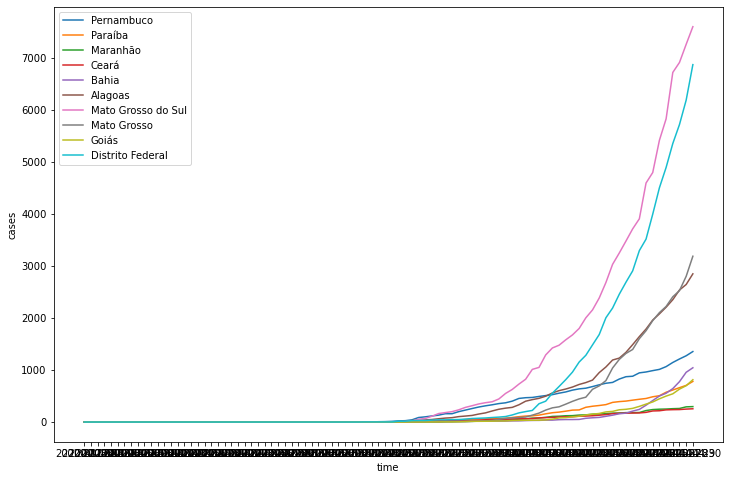

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (12,8)
a = []
i=0
for s in df.state:
    if(i<10):
        data = df.loc[df.state==s].sort_values('date')
        plt.plot(data['date'],data['cases'])
        plt.ylabel('cases')
        plt.xlabel('time')
        a = np.append([s],a)
        plt.legend(a, loc='upper left')
        i=i+1


No próximo gráfico podemos observar a percentagem de casos de COVID-19 nos estados de maior ocurrência referida a última data
do dataset

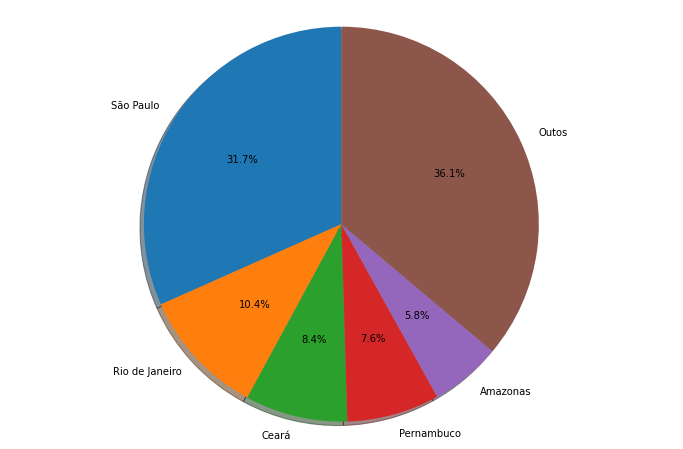

In [5]:
import matplotlib.pyplot as plt 
  
# defining labels 
i=0
states=[]
cases=0
while i<27:
    if(i!=23 and i!=22 and i!=6 and i!=9):
        cases =tf.cases.iat[i] + cases
    i=i+1
    
activities = [tf.state.iat[23], tf.state.iat[22], tf.state.iat[6], tf.state.iat[9],tf.state.iat[15],"Outos"] 
  
# portion covered by each label 
slices = [tf.cases.iat[23], tf.cases.iat[22], tf.cases.iat[6], tf.cases.iat[9],tf.cases.iat[15], cases] 
  
fig1, ax1 = plt.subplots()
ax1.pie(slices, explode=(0, 0,0,0,0,0), labels=activities, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show() 

No próximo gráfico podemos ver a relação entre o número de pessoas infectadas com o número de mortes, nos estados 
mais infetados.

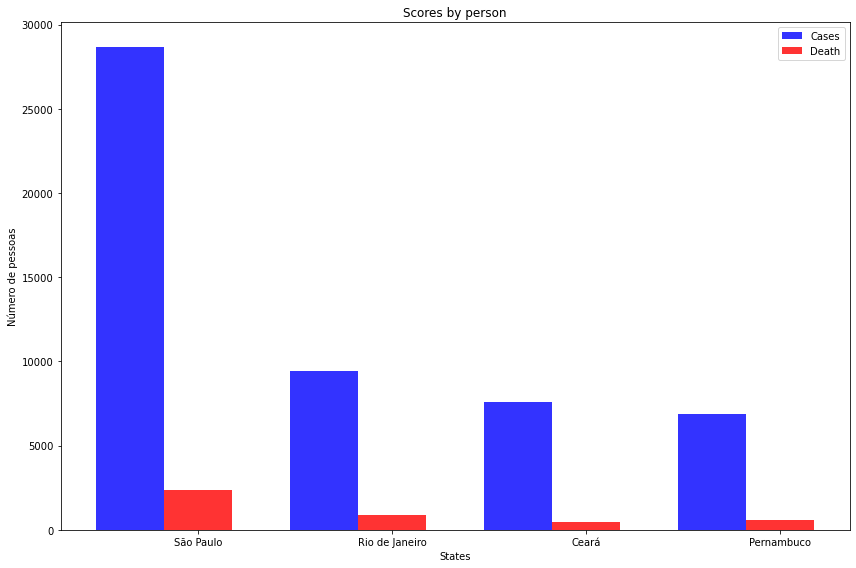

In [6]:
import numpy as np
import matplotlib.pyplot as plt
df = df.tail(27) 

# data to plot
n_groups = 4
means_frank = (tf.cases.iat[23], tf.cases.iat[22], tf.cases.iat[6], tf.cases.iat[9])
means_guido = (tf.deaths.iat[23], tf.deaths.iat[22], tf.deaths.iat[6], tf.deaths.iat[9])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Cases')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Death')

plt.xlabel('States')
plt.ylabel('Número de pessoas')
plt.title('Scores by person')
plt.xticks(index + bar_width, (tf.state.iat[23],tf.state.iat[22], tf.state.iat[6], tf.state.iat[9]))
plt.legend()

plt.tight_layout()
plt.show()

# Análise Geográfica
Neste momento vamos pegar num Geopackage relacionado com os dados analisados anteriormente, mas estes, sendo posteriormente 
modificados no QGIS.
No QGIS importei o dataset, filtrando-o só para a data 30-04-2020 (a última data ocurrida no dataset), também importei o mapa 
mundo com os estados, e filtrei de maneira a só ficar os estados do Brasil. De seguida, juntei as duas camadas e modificando
as cores do mapa dependendo do número infetados no estado.

In [7]:
covid_gpkg = "covid-brazil-master1.gpkg"
estado = QgsVectorLayer(covid_gpkg, "ne_10m_admin_1_states_provincess", "ogr")
if not estado.isValid():
    print("Layer failed to load!")
else:
    QgsProject.instance().addMapLayer(estado)
    print("Layer loaded")

Layer loaded


In [8]:
for c in estado.getFeatures():
        print("Em {} há {} caso(s) confirmados".format(c["name"], c["brazil_covid19_cases"]))

Em Rio Grande do Sul há 1466 caso(s) confirmados
Em Roraima há 519 caso(s) confirmados
Em Pará há 2876 caso(s) confirmados
Em Acre há 404 caso(s) confirmados
Em Amapá há 1080 caso(s) confirmados
Em Mato Grosso do Sul há 255 caso(s) confirmados
Em Paraná há 1407 caso(s) confirmados
Em Santa Catarina há 2085 caso(s) confirmados
Em Amazonas há 5254 caso(s) confirmados
Em Rondônia há 502 caso(s) confirmados
Em Mato Grosso há 297 caso(s) confirmados
Em Maranhão há 3190 caso(s) confirmados
Em Piauí há 513 caso(s) confirmados
Em Ceará há 7606 caso(s) confirmados
Em Rio Grande do Norte há 1177 caso(s) confirmados
Em Paraíba há 814 caso(s) confirmados
Em Pernambuco há 6876 caso(s) confirmados
Em Alagoas há 1044 caso(s) confirmados
Em Sergipe há 447 caso(s) confirmados
Em Bahia há 2851 caso(s) confirmados
Em Espírito Santo há 2465 caso(s) confirmados
Em Rio de Janeiro há 9453 caso(s) confirmados
Em São Paulo há 28698 caso(s) confirmados
Em Goiás há 781 caso(s) confirmados
Em Distrito Federal há 

In [9]:
xt = estado.extent()
width  = 500
height = int(width*xt.height()/xt.width())

options = QgsMapSettings()
options.setLayers([estado])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

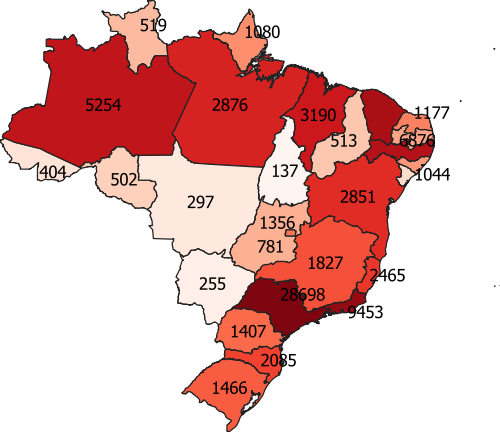

In [10]:
from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

In [11]:
qgs.exitQgis()

# Conclusão
Na resolução deste trabalho aprofundei várias técnicas de análise dados, bem como uma nova experiência com novas ferramentas,
como o QGIS, senti que podia ter feito algo melhor com mais tempo, tive algumas dificuldades por a correr o QGIS no Jupyter
notebook, mas mesmo assim acho que consegui um trabalho bem conseguido para as limitações que tive.